In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

Preview of Dataset

In [ ]:
df2 = pd.read_csv("PanelStudyIncomeDynamics.csv")
df2.head()

,intnum68,pernum68,wave,sex,intnum,farminc,region,famwgt,relhead,age,...,foodcare,building,sales,officeadmin,farmer,constructextractinstall,production,transport,sumocc,LEHS
0,1152,24,1981,1,3505,0.0,1.0,17.000,10,34,...,0,0,1,0,0,0,0,0,1,0
1,5057,171,1981,1,675,0.0,2.0,2.000,10,32,...,0,0,0,0,0,0,1,0,1,1
2,6375,170,2009,1,8505,0.0,1.0,6.565,10,64,...,0,0,0,0,0,0,1,0,1,1
3,2261,3,1999,1,4202,0.0,2.0,25.973,10,50,...,0,0,0,0,0,0,0,1,1,1
4,5927,7,1990,1,605,0.0,3.0,14.819,10,26,...,0,0,0,0,0,0,1,0,1,1


We decided that out of the 274 variables that Sex, Age, Annual Hours, Annual Income, Degree, and Years of Experience would be the most important features to focus on in this dataset.

In [ ]:
newgender_df2 = df2[['sex','age','annhrs','annlabinc','degree','yrsexp']]
newgender_df2.head()

,sex,age,annhrs,annlabinc,degree,yrsexp
0,1,34,1600,10000.0,1.0,12.0
1,1,32,520,9095.0,0.0,14.0
2,1,64,2550,45200.0,0.0,39.0
3,1,50,3072,25000.0,0.0,30.0
4,1,26,2100,24500.0,0.0,8.0


We renamed the annual income and years of experience variable to make them easier to understand.

In [ ]:
newgender_df2 = newgender_df2.rename(columns={ 'annlabinc': 'annincome','yrsexp' : 'explevel'})
newgender_df2.head()

,sex,age,annhrs,annincome,degree,explevel
0,1,34,1600,10000.0,1.0,12.0
1,1,32,520,9095.0,0.0,14.0
2,1,64,2550,45200.0,0.0,39.0
3,1,50,3072,25000.0,0.0,30.0
4,1,26,2100,24500.0,0.0,8.0


To clean up the data further we removed all null values in the columns.

In [ ]:
newgender_df2 = newgender_df2.dropna(axis=0)

In order to see which variables we should use for our models we will see how each variable correlates with annincome (target). Variables with higher correlations are good indicators that those variables will do well in predicting the target variable. Each variable does not have a very high correlation to annincome, but not very low either so we wil use all variables.

In [ ]:
newgender_df2.corr()

,sex,age,annhrs,annincome,degree,explevel
sex,1.000000,0.014339,-0.306948,-0.199973,0.009309,-0.110499
age,0.014339,1.000000,-0.010836,0.146860,0.035542,0.873512
annhrs,-0.306948,-0.010836,1.000000,0.295395,0.045269,0.081731
annincome,-0.199973,0.146860,0.295395,1.000000,0.320868,0.150997
degree,0.009309,0.035542,0.045269,0.320868,1.000000,0.021447
explevel,-0.110499,0.873512,0.081731,0.150997,0.021447,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

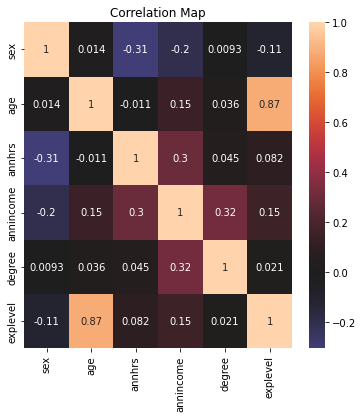

In [ ]:
plt.figure(figsize = (6,6))
sns.heatmap(newgender_df2.corr(), center=0, annot=True)
plt.title('Correlation Map')
plt.show

The first model we will use is linear regression. To prepare the model we train and test the model using a test, train split.

In [ ]:
train, test = train_test_split(newgender_df2, test_size=0.2, random_state=1)
model = LinearRegression()
model.fit(
    X=train[["sex", "age", "annhrs","degree", "explevel"]],
    y=train["annincome"]
)
predicted = model.predict(
    X=test[["sex", "age", "annhrs","degree", "explevel"]]
)
expected = test["annincome"]

To measure the accuracy of the model we look at the mean squared error and the root mean squared error.

In [ ]:
lr_mse = mean_squared_error(expected, predicted)
print(lr_mse)
lr_rmse = mean_squared_error(expected, predicted, squared = False)
print(lr_rmse)

1117327357.4275784
33426.446975824074


To see which variables held more weight in the model we used the SelectKbest function to be able to see which variables had the highest importance scores. In the figure we see that Annual Hours and Degree had a high importance, Sex had a good amount of importance as well, while Age and Experience Level didn't have much importance.

Feature 0: 1072.537640
Feature 1: 591.129558
Feature 2: 2504.987713
Feature 3: 3003.904158
Feature 4: 626.622170


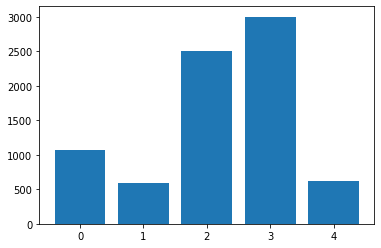

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=f_regression, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs
 
# feature selection
X_train_fs, X_test_fs, fs = select_features(train[["sex", "age", "annhrs","degree", "explevel"]], train["annincome"], test[["sex", "age", "annhrs","degree", "explevel"]])
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Below is a preview of the predicted Annual Income on the actual data.

In [ ]:
newgender_df2["Predicted annincome Linear"] = model.predict(
    X=newgender_df2[["sex", "age", "annhrs","degree", "explevel"]]
)

In [ ]:
newgender_df2.head()

,sex,age,annhrs,annincome,degree,explevel,Predicted annincome Linear
0,1,34,1600,10000.0,1.0,12.0,46781.258381
1,1,32,520,9095.0,0.0,14.0,5770.474764
2,1,64,2550,45200.0,0.0,39.0,57839.742911
3,1,50,3072,25000.0,0.0,30.0,58084.934217
4,1,26,2100,24500.0,0.0,8.0,29044.348813


The second model we will use is K-nearest neighbors regression. To prepare the model we train and test the model using a test, train split.

In [ ]:
x_data = newgender_df2[["sex", "age", "annhrs","degree", "explevel"]]
y_data = newgender_df2["annincome"]
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data,test_size=0.2, random_state = 1)
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
predicted = knn_model.predict(X_train)

To measure the accuracy of the model we look at the mean squared error and the root mean squared error.

In [ ]:
mse = mean_squared_error(y_train, predicted)
print(mse)
rmse = mean_squared_error(y_train, predicted,squared = False)
print(rmse)

1135422239.9614055
33696.02706494351


Below is a preview of the predicted Annual Income on the actual data.'

In [ ]:
newgender_df2["Predicted annincome KNN"] = knn_model.predict(
    X=newgender_df2[["sex", "age", "annhrs","degree", "explevel"]]
)

In [ ]:
newgender_df2.head()

,sex,age,annhrs,annincome,degree,explevel,Predicted annincome Linear,Predicted annincome KNN
0,1,34,1600,10000.0,1.0,12.0,46781.258381,20960.0
1,1,32,520,9095.0,0.0,14.0,5770.474764,5095.6
2,1,64,2550,45200.0,0.0,39.0,57839.742911,76172.4
3,1,50,3072,25000.0,0.0,30.0,58084.934217,44702.4
4,1,26,2100,24500.0,0.0,8.0,29044.348813,22500.0


To make it easier when analyzing the graphs for bias later on, we grouped ages and experience into groups


In [ ]:
newgender_df2.loc[newgender_df2['age']<=20, 'age_group'] = '0-20'
newgender_df2.loc[newgender_df2['age'].between(20,30), 'age_group'] = '20-30'
newgender_df2.loc[newgender_df2['age'].between(30,40), 'age_group'] = '30-40'
newgender_df2.loc[newgender_df2['age'].between(40,50), 'age_group'] = '40-50'
newgender_df2.loc[newgender_df2['age']>50, 'age_group'] = '50+'

newgender_df2.loc[newgender_df2['explevel']<=5, 'experience_group'] = '0-5'
newgender_df2.loc[newgender_df2['explevel'].between(5,10), 'experience_group'] = '5-10'
newgender_df2.loc[newgender_df2['explevel'].between(10,15), 'experience_group'] = '10-15'
newgender_df2.loc[newgender_df2['explevel'].between(15,20), 'experience_group'] = '15-20'
newgender_df2.loc[newgender_df2['explevel'].between(20,25), 'experience_group'] = '20-25'
newgender_df2.loc[newgender_df2['explevel']>25, 'experience_group'] = '25+'

Created "is_rich" column with binary values if income was larger than the median income, that person would be regarded as a higher income earning individual.

In [ ]:
newgender_df2['is_rich'] = pd.cut(newgender_df2['annincome'], bins=[0, newgender_df2['annincome'].median(), float('Inf')], labels=[0, 1])
newgender_df2.head()

,sex,age,annhrs,annincome,degree,explevel,Predicted annincome Linear,Predicted annincome KNN,age_group,experience_group,is_rich
0,1,34,1600,10000.0,1.0,12.0,46781.258381,20960.0,30-40,10-15,0
1,1,32,520,9095.0,0.0,14.0,5770.474764,5095.6,30-40,10-15,0
2,1,64,2550,45200.0,0.0,39.0,57839.742911,76172.4,50+,25+,1
3,1,50,3072,25000.0,0.0,30.0,58084.934217,44702.4,40-50,25+,0
4,1,26,2100,24500.0,0.0,8.0,29044.348813,22500.0,20-30,5-10,0


Preprocessed data and modified knn trained model with age_group and experience_group

In [ ]:
x_data = newgender_df2[["sex", "age", "annhrs","degree", "explevel", "age_group", "experience_group"]]
y_data = newgender_df2[["annincome", "is_rich"]]
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(x_data, y_data,test_size=0.2, random_state = 1)
X_train = X_train_cat[["sex", "age", "annhrs","degree", "explevel"]]
X_test = X_test_cat[["sex", "age", "annhrs","degree", "explevel"]]
y_train = y_train_cat["annincome"]
y_test = y_test_cat["annincome"]
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
predicted = knn_model.predict(X_test)
knn_score = knn_model.score(X_test,y_test)
print(predicted)
print(knn_score)
x_data.head()

[27322.   4869.6  4922.4 ... 49320.   1875.2 33040.4]
0.025263350612633073


,sex,age,annhrs,degree,explevel,age_group,experience_group
0,1,34,1600,1.0,12.0,30-40,10-15
1,1,32,520,0.0,14.0,30-40,10-15
2,1,64,2550,0.0,39.0,50+,25+
3,1,50,3072,0.0,30.0,40-50,25+
4,1,26,2100,0.0,8.0,20-30,5-10


Recalculated mean squared error

In [ ]:
mse = mean_squared_error(y_test, predicted)
print(mse)
rmse = mean_squared_error(y_test, predicted,squared = False)
print(rmse)

1429740182.1624162
37811.90529664455


Installed aequitas 

In [ ]:
!pip install -q aequitas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 KB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 KB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 KB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.4/456.4 KB 28.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.8/727.8 KB 37.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 KB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

Created "score" which is the predicted value of "is_rich" and renamed "is_rich" to label_value. A score of 1 means the person if of higher income.

In [ ]:
import aequitas 
from aequitas.preprocessing import preprocess_input_df
    
# double-check that categorical columns are of type 'string'
df = pd.DataFrame(X_test_cat)
df[["sex", "age_group", "annhrs","degree", "experience_group"]] = df[["sex", "age_group", "annhrs","degree", "experience_group"]].astype(str)
df["score"] = predicted > y_test.median()
df["label_value"] = y_test_cat["is_rich"]
print(type(y_test.iloc[0]))
df["score"] = df["score"].astype(int)
df.head()

<class 'numpy.float64'>


,sex,age,annhrs,degree,explevel,age_group,experience_group,score,label_value
30558,2,35,2350,0.0,15.0,30-40,15-20,0,1
20275,2,61,392,1.0,37.0,50+,25+,0,0
27706,2,43,399,1.0,15.0,40-50,15-20,0,0
195,1,53,1944,0.0,29.0,50+,25+,1,1
16981,2,31,2040,0.0,12.0,30-40,10-15,0,0


In [ ]:
df = df.drop(columns="annhrs")
df = df.drop(columns="explevel")
df = df.drop(columns="age")
df, _ = preprocess_input_df(df)

In [ ]:
from aequitas.group import Group
    
g = Group()
xtab, _ = g.get_crosstabs(df)

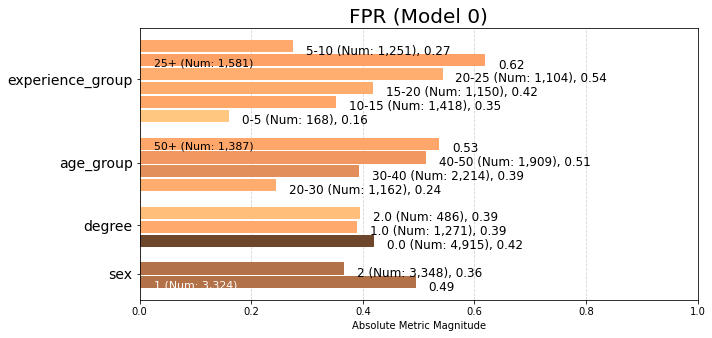

In [ ]:
from aequitas.plotting import Plot
    
aqp = Plot()
fpr_plot = aqp.plot_group_metric(xtab, 'fpr')

Removed "annhours", "explevel", and "age" columns. From there we created a False Positive Rate plot which shows the likelihood of being wrong about the prediction. The prediction of males is 0.49 times more likely to be wrong about being higher income earners.

To compute Bias, we choose the reference group to be an average male in the workforce with a college degree and 10-15 years of experience to compare to.

In [ ]:
from aequitas.bias import Bias
b = Bias()
bdf = b.get_disparity_predefined_groups(xtab, original_df=df, ref_groups_dict={'sex':'1', 'degree':'1.0', 'age_group':'30-40', 'experience_group': '10-15'}, alpha=0.05, mask_significance=True)
bdf.style

get_disparity_predefined_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,0,binary 0/1,3926,sex,1,0.820449,0.507202,0.349854,0.283224,0.492798,0.179551,0.650146,0.716776,2295,1029,0.584564,0.690433,650,360,669,1645,2005,1319,3324,6672,0.603189,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1,1,1,1,1,1,1,1,1,1
1,0,binary 0/1,3926,sex,2,0.676003,0.635915,0.249272,0.452483,0.364085,0.323997,0.750728,0.547517,1631,1717,0.415436,0.487157,738,428,1289,893,1321,2027,3348,6672,0.394564,0.710675,0.705581,0.763861,1.597614,0.712502,0.738812,1.804483,0.823943,1.253770,1.154707,1,1,1,1,1,1,1,1,1,1
2,0,binary 0/1,3926,degree,0.0,0.746555,0.580992,0.235160,0.443303,0.419008,0.253445,0.764840,0.556697,2725,2190,0.694091,0.554425,1208,515,1675,1517,2032,2883,4915,6672,0.413428,3.224852,0.833934,0.670099,2.619516,0.500890,1.081216,1.143036,0.959249,0.948611,1.441690,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0,binary 0/1,3926,degree,1.0,0.778271,0.612466,0.469484,0.169231,0.387534,0.221729,0.530516,0.830769,845,426,0.215232,0.664831,143,200,226,702,902,369,1271,6672,0.709677,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0,binary 0/1,3926,degree,2.0,0.813776,0.606383,0.561538,0.103933,0.393617,0.186224,0.438462,0.896067,356,130,0.090678,0.732510,37,73,57,319,392,94,486,6672,0.806584,0.421302,1.101799,1.078600,0.614147,1.196077,1.015697,0.839872,1.045620,0.990068,0.826481,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,0,binary 0/1,3926,age_group,20-30,0.547786,0.757162,0.259012,0.430993,0.242838,0.452214,0.740988,0.569007,413,749,0.105196,0.355422,178,194,555,235,429,733,1162,6672,0.369191,0.334413,0.637169,0.903244,1.164718,0.946167,0.620644,1.764986,0.736483,1.243834,1.020291,30-40,30-40,30-40,30-40,30-40,30-40,30-40,30-40,30-40,30-40
6,0,binary 0/1,3926,age_group,30-40,0.743786,0.608733,0.273749,0.370040,0.391267,0.256214,0.726251,0.629960,1235,979,0.314570,0.557814,457,268,711,778,1046,1168,2214,6672,0.472448,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30-40,30-40,30-40,30-40,30-40,30-40,30-40,30-40,30-40,30-40
7,0,binary 0/1,3926,age_group,40-50,0.821192,0.488263,0.312397,0.334356,0.511737,0.178808,0.687603,0.665644,1304,605,0.332145,0.683080,436,189,416,868,1057,852,1909,6672,0.553693,1.055870,1.224566,1.056646,0.903566,1.141180,1.307897,0.697885,1.104071,0.802097,0.946784,30-40,30-40,30-40,30-40,30-40,30-40,30-40,30-40,30-40,30-40
8,0,binary 0/1,3926,age_group,50+,0.827456,0.465430,0.331719,0.325462,0.534570,0.172544,0.668281,0.674538,974,413,0.248090,0.702235,317,137,276,657,794,593,1387,6672,0.572459,0.788664,1.258906,1.070764,0.879531,1.211765,1.366253,0.673437,1.112492,0.764588,0.920179,30-40,30-40,30-40,30-40,30-40,30-40,30-40,30-40,30-40,30-40
9,0,binary 0/1,3926,experience_group,0-5,0.555556,0.840909,0.125984,0.512195,0.159091,0.444444,0.874016,0.487805,41,127,0.010443,0.244048,21,16,111,20,36,132,168,6672,0.214286,0.055182,0.465760,0.774442,1.383858,0.512285,0.453554,1.697456,0.752612,1.295231,1.159058,10-15,10-15,10-15,10-15,10-15,10-15,10-15,10-15,10-15,10-15


In [ ]:
calculated_disparities = b.list_disparities(bdf)
disparity_significance = b.list_significance(bdf)
disparity_significance

[]

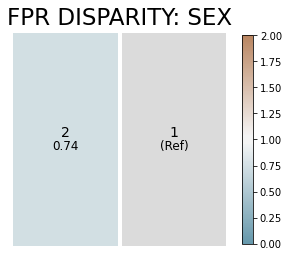

In [ ]:
bdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance]

aqp.plot_disparity(bdf, group_metric='fpr_disparity', attribute_name='sex', significance_alpha=0.05)


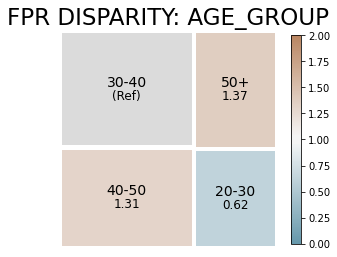

In [ ]:
bdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance]

aqp.plot_disparity(bdf, group_metric='fpr_disparity', attribute_name='age_group', significance_alpha=0.05)

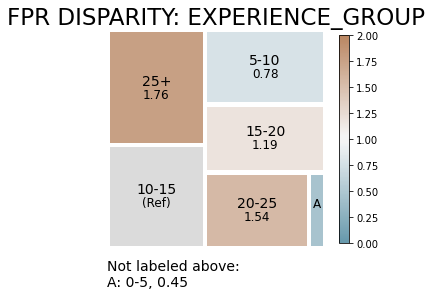

In [ ]:
bdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance]

aqp.plot_disparity(bdf, group_metric='fpr_disparity', attribute_name='experience_group', significance_alpha=0.05)

Created 3 FPR plots based on sex, experience, and age. While there is bias present in all three, experience had the most bias present.

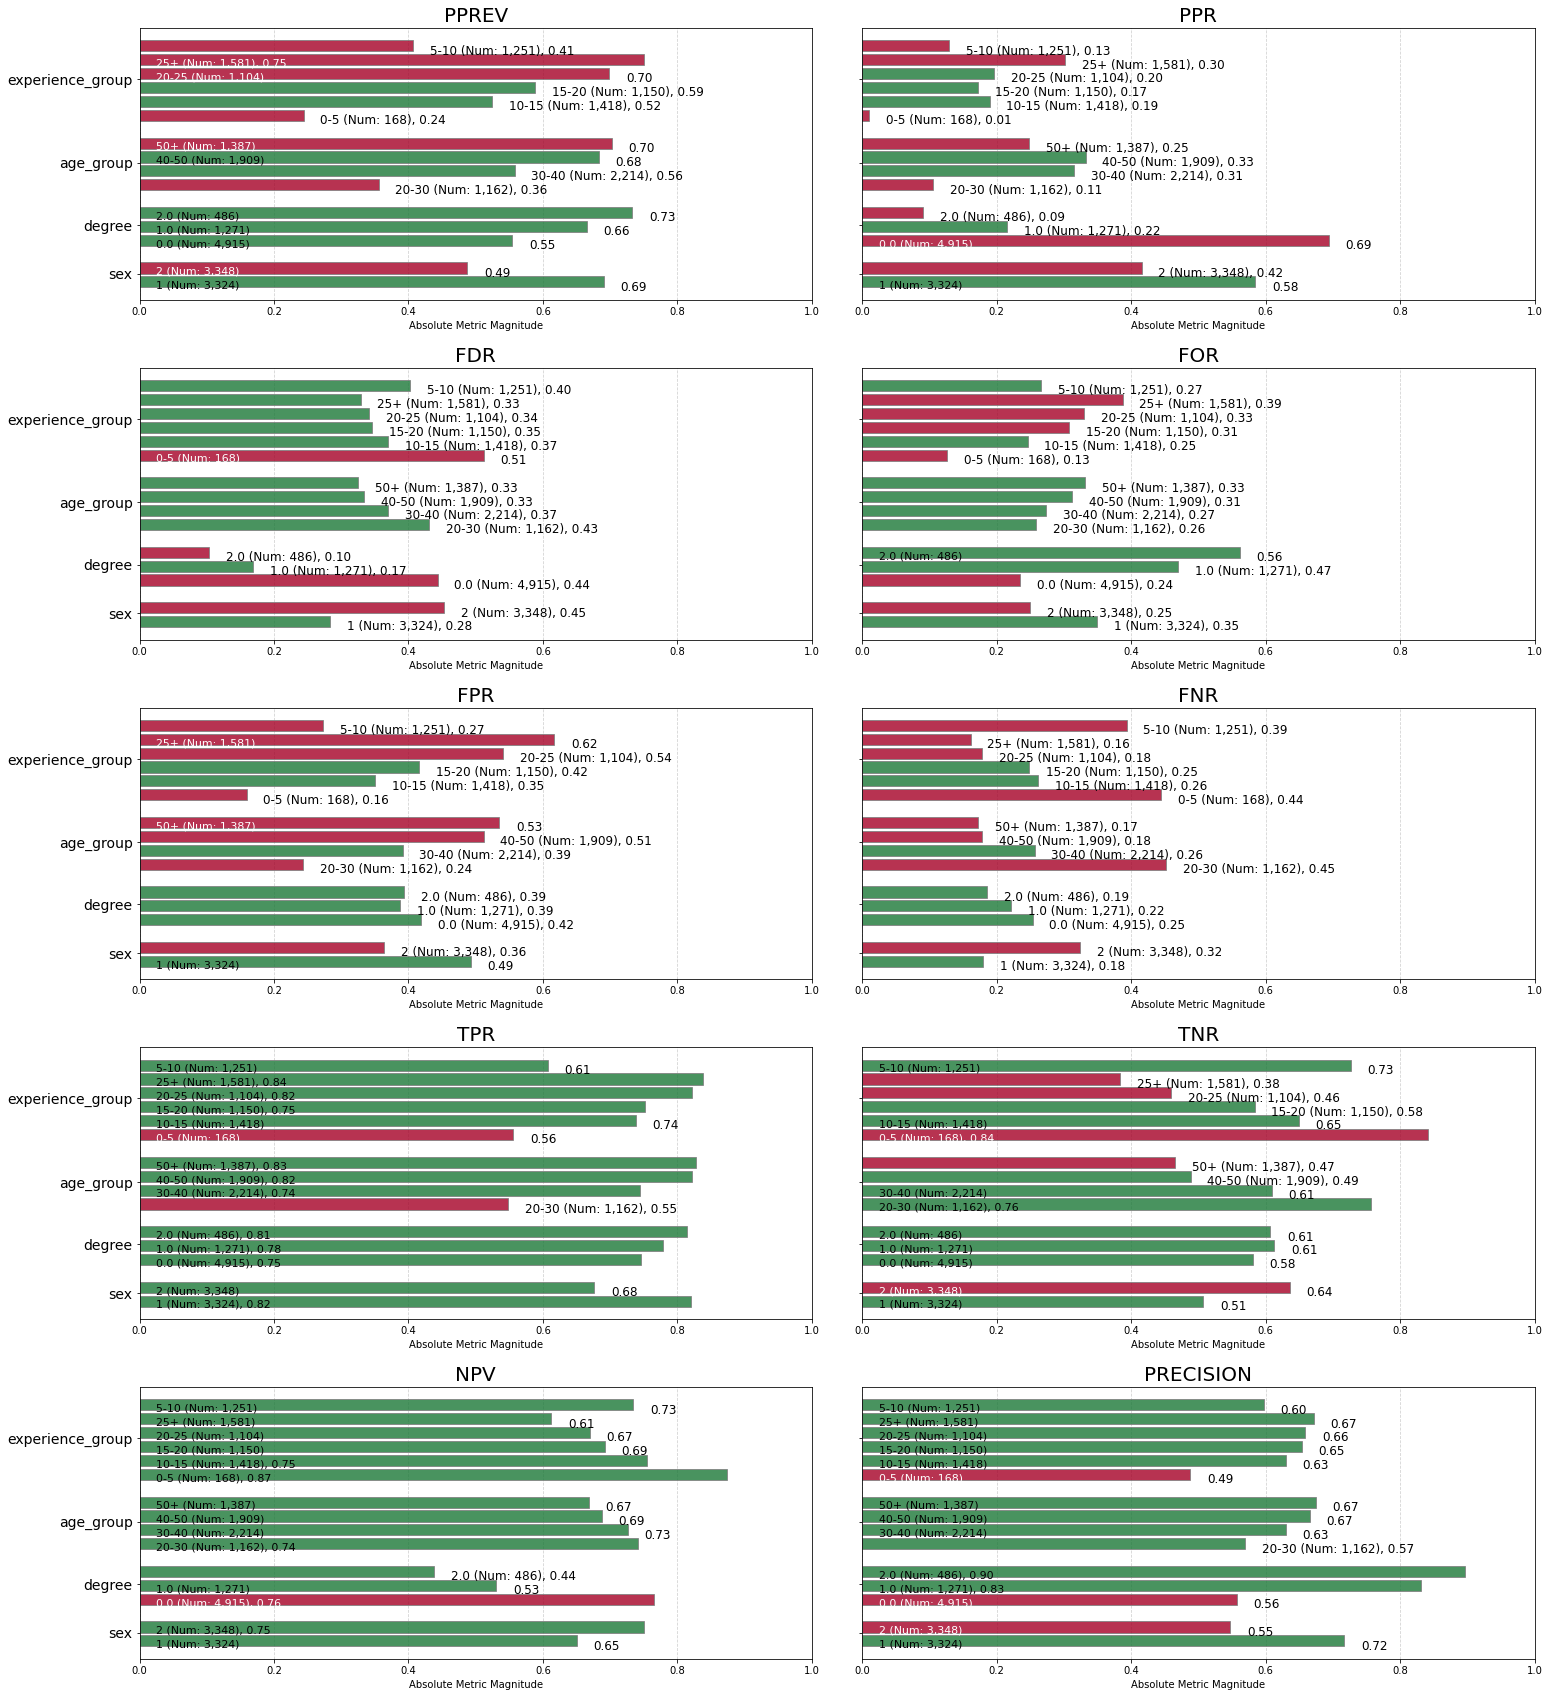

<Figure size 432x288 with 0 Axes>

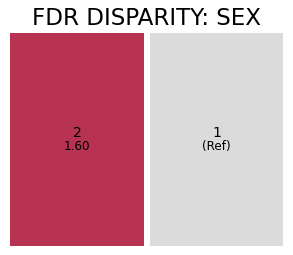

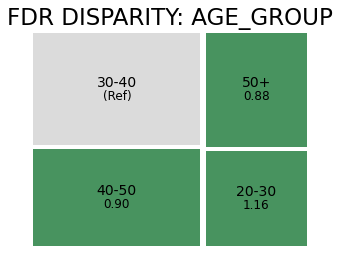

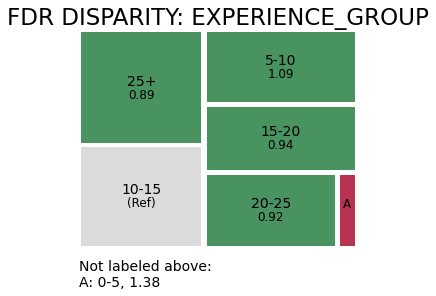

In [ ]:
from aequitas.fairness import Fairness
f = Fairness()
fdf = f.get_group_value_fairness(bdf)
fg = aqp.plot_fairness_group_all(fdf, ncols=2, metrics = "all")
m = aqp.plot_fairness_disparity(fdf, group_metric='fdr', attribute_name='sex')
m = aqp.plot_fairness_disparity(fdf, group_metric='fdr', attribute_name='age_group')
m = aqp.plot_fairness_disparity(fdf, group_metric='fdr', attribute_name='experience_group')

Created three fairness plots for the same variables. Red suggests generally more unfair while green suggests generally more fair. Sex is unfair, while age and experience is fair.